In [4]:
import pandas as pd

In [5]:
import seaborn as sns

## 1. Загрузите файл HR.csv в pandas dataframe

In [22]:
df = pd.read_csv('HR.csv')

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2. Рассчитайте основные статистики для переменных

## (среднее,медиана,мода,мин/макс,сред.отклонение)

In [19]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
#моду посчитаем отдельно

print('Мода satisfaction_level: ', df.satisfaction_level.round().mode()[0])
print('Мода last_evaluation: ', df.last_evaluation.round().mode()[0])
print('Мода number_project: ', df.number_project.round().mode()[0])
print('Мода average_montly_hours: ', df.average_montly_hours.round().mode()[0])
print('Мода time_spend_company: ', df.time_spend_company.round().mode()[0])
print('Мода Work_accident:', df.Work_accident.round().mode()[0])
print('Мода left: ', df.left.round().mode()[0])
print('Мода promotion_last_5years: ', df.promotion_last_5years.round().mode()[0])

Мода satisfaction_level:  1.0
Мода last_evaluation:  1.0
Мода number_project:  4
Мода average_montly_hours:  135
Мода time_spend_company:  3
Мода Work_accident: 0
Мода left:  0
Мода promotion_last_5years:  0


## 3. Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных.

   ## Определите две самые скоррелированные и две наименеескоррелированные переменные.

In [33]:
#оставляю только количественные переменные
df_ = df.drop(df.columns[[2, 5, 6, 7, 8, 9]], axis=1)

In [35]:
#расчитываю коррелицию
df_.corr()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.339742,0.131591
average_montly_hours,-0.020048,0.339742,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.127755,1.000000


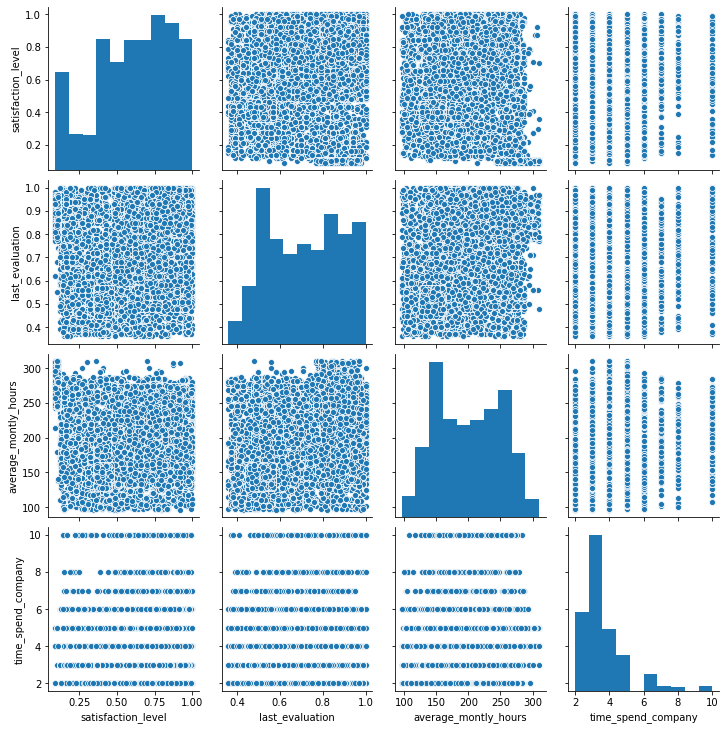

In [24]:
sns.pairplot(df_)

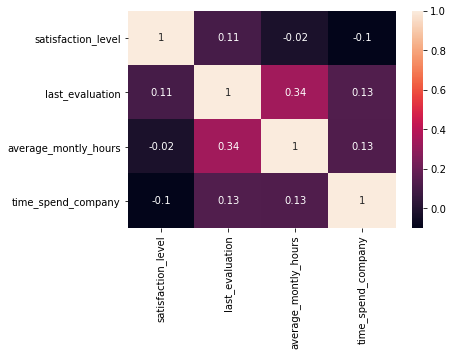

In [38]:
#построю еще тепловую карту
sns.heatmap(df_.corr(), annot=True)

In [ ]:
#ни по графикам, ни по тепловой карте я не вижу, чтоб была корреляция между переменными.

#наиболее скореллированы среднее кол-во рабочих часов и время с момента последней оценки в годах (0.34)
#но вряд ли это имеет какой-то физический смысл.

#наименее скореллированы — среднее кол-во рабочих часов и уровень удовлетворенности (-0.02).

## 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [30]:
df.groupby('department').count()[['satisfaction_level']]

,satisfaction_level
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


## 5. Покажите распределение сотрудников по зарплатам.

In [29]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

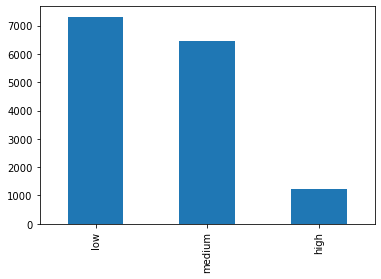

In [28]:
df.salary.value_counts().plot.bar()

## 6. Покажите распределение сотрудников по зарплатам в каждомдепартаменте по отдельности

In [35]:
df.groupby(['department', 'salary']).count()[['satisfaction_level']]

satisfaction_level
department salary                    
IT         high                    83
           low                    609
           medium                 535
RandD      high                    51
           low                    364

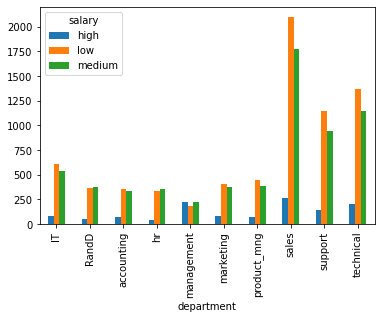

In [21]:
dep_group = df[['department', 'salary', 'left']]
dep_salary = dep_group.pivot_table('left', index = 'department', columns = 'salary', aggfunc = 'count')

dep_salary.plot.bar()

## 7. Проверьте гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [ ]:
#на самом деле я не дошла до лекций по проверке гтпотез
#но кажется, что чтобы проверить эту гипотезу, 
#можно посчитать average_montly_hours для сотрудников в низким и высоким окладом, а затем сравнить их

#если среднее время проведенное на работе у сотрудников с высоким окладом больше
#то гипотеза подтвердится

In [44]:
df1 = df[['average_montly_hours', 'salary']]
df2 = df1[df1.salary == 'low']
df3 = df1[df1.salary == 'high']

print(df2.average_montly_hours.mean()) #среднее кол-во часов для сотрудников с низким окладом
print(df3.average_montly_hours.mean()) #среднее кол-во часов для сотрудников с высоким окладом

200.9965828321487
199.86742118027485


In [ ]:
#гипотеза не подтвердилась.
#сотрудники с низким окладом проводят на работе больше времении, чем сотрудники с высоким

# 8.Рассчитайте следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

●Доля сотрудников с повышением за последние 5 лет

●Средняя степень удовлетворенности

●Среднее количество проектов

In [ ]:
#считаю, что

   #left = 0 — сотрудник не уволился
   #left = 1 — сотрудник уволился

In [47]:
#Доля сотрудников с повышением за последние 5 лет

df4 = df[['promotion_last_5years', 'left']]

df5 = df4[df4.left == 0]
df6 = df4[df4.left == 1]

print(f'Процент сотрудников с повышением за последние 5 лет (работают): {((df5.promotion_last_5years.sum()/df5.promotion_last_5years.count()) * 100).round(2)}%')

print(f'Процент сотрудников с повышением за последние 5 лет (уволены): {((df6.promotion_last_5years.sum()/df6.promotion_last_5years.count()) * 100).round(2)}%')


Процент сотрудников с повышением за последние 5 лет (работают): 2.63%
Процент сотрудников с повышением за последние 5 лет (уволены): 0.53%


In [49]:
#Средняя степень удовлетворенности

df7 = df[['satisfaction_level', 'left']]

df8 = df7[df4.left == 0]
df9 = df7[df4.left == 1]


print(f'Средняя степень удовлетворенности (работают): {round(df8.satisfaction_level.mean(), 2)}')
print(f'Средняя степень удовлетворенности (уволены): {round(df9.satisfaction_level.mean(), 2)}')

Средняя степень удовлетворенности (работают): 0.67
Средняя степень удовлетворенности (уволены): 0.44


In [52]:
#Среднее количество проектов

df10 = df[['number_project', 'left']]

df11 = df10[df10.left == 0]
df12 = df10[df10.left == 1]

print(f'Среднее количество проектов у работающих сотрудников: {round(df11.number_project.mean(), 2)}')
print(f'Среднее количество проектов у уволившихся сотрудников: {round(df12.number_project.mean(), 2)}')

Среднее количество проектов у работающих сотрудников: 3.79
Среднее количество проектов у уволившихся сотрудников: 3.86
